In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
from tqdm import tqdm
import sys
sys.path.insert(0,'/home/dan/Desktop/kaggle/kaggle-ieee-cis-fraud-detection/src/')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.metrics import f1_score, confusion_matrix, classification_report

from load import BaseDataLoader
from preprocessing import Preprocessor
from utils import reduce_mem_usage
from settings import DATA_DIR
from cross_val_labo import CrossValLabo

In [4]:
data = BaseDataLoader(DATA_DIR).files

Loaded tables' types are not converted


In [5]:
data.keys()

dict_keys(['test_transaction', 'train_identity', 'train_transaction', 'test_identity', 'sample_submission'])

In [6]:
train_transaction, train_identity, test_transaction, test_identity = data['train_transaction'], data['train_identity'], data['test_transaction'], data['test_identity']

In [7]:
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

In [8]:
del train_transaction
del train_identity
del test_transaction
del test_identity

In [9]:
preprocessor = Preprocessor()
train = Preprocessor.remove_nan(train)
test = Preprocessor.remove_nan(test)

In [10]:
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)

Memory usage of properties dataframe is: 1971.139907836914MB
Previous type of column TransactionID props[col].dtype
New type of column TransactionID uint32
Previous type of column isFraud props[col].dtype
New type of column isFraud int8
Previous type of column TransactionDT props[col].dtype
New type of column TransactionDT uint32
Previous type of column TransactionAmt props[col].dtype
New type of column TransactionAmt float32
Previous type of column card1 props[col].dtype
New type of column card1 uint16
Previous type of column card2 props[col].dtype
New type of column card2 uint16
Previous type of column card3 props[col].dtype
New type of column card3 uint8
Previous type of column card5 props[col].dtype
New type of column card5 uint8
Previous type of column addr1 props[col].dtype
New type of column addr1 uint16
Previous type of column addr2 props[col].dtype
New type of column addr2 uint8
Previous type of column dist1 props[col].dtype
New type of column dist1 int16
Previous type of colu

New type of column V70 int8
Previous type of column V71 props[col].dtype
New type of column V71 int8
Previous type of column V72 props[col].dtype
New type of column V72 int8
Previous type of column V73 props[col].dtype
New type of column V73 int8
Previous type of column V74 props[col].dtype
New type of column V74 int8
Previous type of column V75 props[col].dtype
New type of column V75 int8
Previous type of column V76 props[col].dtype
New type of column V76 int8
Previous type of column V77 props[col].dtype
New type of column V77 int8
Previous type of column V78 props[col].dtype
New type of column V78 int8
Previous type of column V79 props[col].dtype
New type of column V79 int8
Previous type of column V80 props[col].dtype
New type of column V80 int8
Previous type of column V81 props[col].dtype
New type of column V81 int8
Previous type of column V82 props[col].dtype
New type of column V82 int8
Previous type of column V83 props[col].dtype
New type of column V83 int8
Previous type of column

New type of column V180 int8
Previous type of column V181 props[col].dtype
New type of column V181 int8
Previous type of column V182 props[col].dtype
New type of column V182 int8
Previous type of column V183 props[col].dtype
New type of column V183 int8
Previous type of column V184 props[col].dtype
New type of column V184 int8
Previous type of column V185 props[col].dtype
New type of column V185 int8
Previous type of column V186 props[col].dtype
New type of column V186 int8
Previous type of column V187 props[col].dtype
New type of column V187 int16
Previous type of column V188 props[col].dtype
New type of column V188 int8
Previous type of column V189 props[col].dtype
New type of column V189 int8
Previous type of column V190 props[col].dtype
New type of column V190 int8
Previous type of column V191 props[col].dtype
New type of column V191 int8
Previous type of column V192 props[col].dtype
New type of column V192 int8
Previous type of column V193 props[col].dtype
New type of column V193 

New type of column V292 uint16
Previous type of column V293 props[col].dtype
New type of column V293 int16
Previous type of column V294 props[col].dtype
New type of column V294 int16
Previous type of column V295 props[col].dtype
New type of column V295 int16
Previous type of column V296 props[col].dtype
New type of column V296 int8
Previous type of column V297 props[col].dtype
New type of column V297 int8
Previous type of column V298 props[col].dtype
New type of column V298 int8
Previous type of column V299 props[col].dtype
New type of column V299 int8
Previous type of column V300 props[col].dtype
New type of column V300 int8
Previous type of column V301 props[col].dtype
New type of column V301 int8
Previous type of column V302 props[col].dtype
New type of column V302 int8
Previous type of column V303 props[col].dtype
New type of column V303 int8
Previous type of column V304 props[col].dtype
New type of column V304 int8
Previous type of column V305 props[col].dtype
New type of column V

New type of column C7 int16
Previous type of column C8 props[col].dtype
New type of column C8 int16
Previous type of column C9 props[col].dtype
New type of column C9 int16
Previous type of column C10 props[col].dtype
New type of column C10 int16
Previous type of column C11 props[col].dtype
New type of column C11 int16
Previous type of column C12 props[col].dtype
New type of column C12 int16
Previous type of column C13 props[col].dtype
New type of column C13 int16
Previous type of column C14 props[col].dtype
New type of column C14 int16
Previous type of column D1 props[col].dtype
New type of column D1 int16
Previous type of column D2 props[col].dtype
New type of column D2 int16
Previous type of column D3 props[col].dtype
New type of column D3 int16
Previous type of column D4 props[col].dtype
New type of column D4 int16
Previous type of column D5 props[col].dtype
New type of column D5 int16
Previous type of column D6 props[col].dtype
New type of column D6 int16
Previous type of column D7

New type of column V91 int8
Previous type of column V92 props[col].dtype
New type of column V92 int8
Previous type of column V93 props[col].dtype
New type of column V93 int8
Previous type of column V94 props[col].dtype
New type of column V94 int8
Previous type of column V95 props[col].dtype
New type of column V95 int8
Previous type of column V96 props[col].dtype
New type of column V96 int8
Previous type of column V97 props[col].dtype
New type of column V97 int8
Previous type of column V98 props[col].dtype
New type of column V98 int8
Previous type of column V99 props[col].dtype
New type of column V99 int8
Previous type of column V100 props[col].dtype
New type of column V100 int8
Previous type of column V101 props[col].dtype
New type of column V101 int8
Previous type of column V102 props[col].dtype
New type of column V102 int8
Previous type of column V103 props[col].dtype
New type of column V103 int8
Previous type of column V104 props[col].dtype
New type of column V104 int8
Previous type

New type of column V201 int8
Previous type of column V202 props[col].dtype
New type of column V202 float32
Previous type of column V203 props[col].dtype
New type of column V203 float32
Previous type of column V204 props[col].dtype
New type of column V204 float32
Previous type of column V205 props[col].dtype
New type of column V205 float32
Previous type of column V206 props[col].dtype
New type of column V206 float32
Previous type of column V207 props[col].dtype
New type of column V207 float32
Previous type of column V208 props[col].dtype
New type of column V208 float32
Previous type of column V209 props[col].dtype
New type of column V209 float32
Previous type of column V210 props[col].dtype
New type of column V210 float32
Previous type of column V211 props[col].dtype
New type of column V211 float32
Previous type of column V212 props[col].dtype
New type of column V212 float32
Previous type of column V213 props[col].dtype
New type of column V213 float32
Previous type of column V214 props[

New type of column V311 float32
Previous type of column V312 props[col].dtype
New type of column V312 float32
Previous type of column V313 props[col].dtype
New type of column V313 float32
Previous type of column V314 props[col].dtype
New type of column V314 float32
Previous type of column V315 props[col].dtype
New type of column V315 float32
Previous type of column V316 props[col].dtype
New type of column V316 float32
Previous type of column V317 props[col].dtype
New type of column V317 float32
Previous type of column V318 props[col].dtype
New type of column V318 float32
Previous type of column V319 props[col].dtype
New type of column V319 float32
Previous type of column V320 props[col].dtype
New type of column V320 float32
Previous type of column V321 props[col].dtype
New type of column V321 float32
Previous type of column V322 props[col].dtype
New type of column V322 int8
Previous type of column V323 props[col].dtype
New type of column V323 int16
Previous type of column V324 props[co

In [11]:
train.shape, test.shape

((590540, 454), (506691, 453))

In [12]:
null_percent = train.isnull().sum()/train.shape[0]*100
cols_to_drop = np.array(null_percent[null_percent > 50].index)
cols_to_drop

array(['R_emaildomain', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28',
       'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38', 'DeviceInfo'], dtype=object)

In [13]:
# TODO: investigate if missing is a kind of information on its own.
train = train.drop(cols_to_drop, axis=1)
test = test.drop(cols_to_drop,axis=1)

In [14]:
null_percent = test.isnull().sum()/train.shape[0]*100
null_cols = null_percent[null_percent > 0]
null_cols

Series([], dtype: float64)

In [15]:
null_cols = ['card4', 'card6', 'P_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M6']
# TODO: better handling of missing value. Display correlation to label of missing values.
for i in null_cols:
    print('data type of {} is {}'.format(i, str(train[i].dtype)))
    train[i] = train[i].replace(np.nan, train[i].mode()[0])
    test[i] = test[i].replace(np.nan, train[i].mode()[0])
    print('Filled the null values of column {}'.format(i))
    print('--------------------------------------------')

data type of card4 is object
Filled the null values of column card4
--------------------------------------------
data type of card6 is object
Filled the null values of column card6
--------------------------------------------
data type of P_emaildomain is object
Filled the null values of column P_emaildomain
--------------------------------------------
data type of M1 is object
Filled the null values of column M1
--------------------------------------------
data type of M2 is object
Filled the null values of column M2
--------------------------------------------
data type of M3 is object
Filled the null values of column M3
--------------------------------------------
data type of M4 is object
Filled the null values of column M4
--------------------------------------------
data type of M6 is object
Filled the null values of column M6
--------------------------------------------


In [16]:
X = train.drop('isFraud', axis=1)
y = train['isFraud']

In [17]:
cat_data = X.select_dtypes(include='object')
num_data = X.select_dtypes(exclude='object')

cat_cols = cat_data.columns.values
num_cols = num_data.columns.values

print('Categorical Columns : ',cat_cols)
print('Numerical Columns : ',num_cols)

Categorical Columns :  ['ProductCD' 'card4' 'card6' 'P_emaildomain' 'M1' 'M2' 'M3' 'M4' 'M5' 'M6'
 'M7' 'M8' 'M9' 'id_12' 'DeviceType']
Numerical Columns :  ['TransactionID' 'TransactionDT' 'TransactionAmt' 'card1' 'card2' 'card3'
 'card5' 'addr1' 'addr2' 'dist1' 'dist2' 'C1' 'C2' 'C3' 'C4' 'C5' 'C6'
 'C7' 'C8' 'C9' 'C10' 'C11' 'C12' 'C13' 'C14' 'D1' 'D2' 'D3' 'D4' 'D5'
 'D6' 'D7' 'D8' 'D9' 'D10' 'D11' 'D12' 'D13' 'D14' 'D15' 'V1' 'V2' 'V3'
 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12' 'V13' 'V14' 'V15' 'V16'
 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24' 'V25' 'V26' 'V27' 'V28'
 'V29' 'V30' 'V31' 'V32' 'V33' 'V34' 'V35' 'V36' 'V37' 'V38' 'V39' 'V40'
 'V41' 'V42' 'V43' 'V44' 'V45' 'V46' 'V47' 'V48' 'V49' 'V50' 'V51' 'V52'
 'V53' 'V54' 'V55' 'V56' 'V57' 'V58' 'V59' 'V60' 'V61' 'V62' 'V63' 'V64'
 'V65' 'V66' 'V67' 'V68' 'V69' 'V70' 'V71' 'V72' 'V73' 'V74' 'V75' 'V76'
 'V77' 'V78' 'V79' 'V80' 'V81' 'V82' 'V83' 'V84' 'V85' 'V86' 'V87' 'V88'
 'V89' 'V90' 'V91' 'V92' 'V93' 'V94' 'V95' '

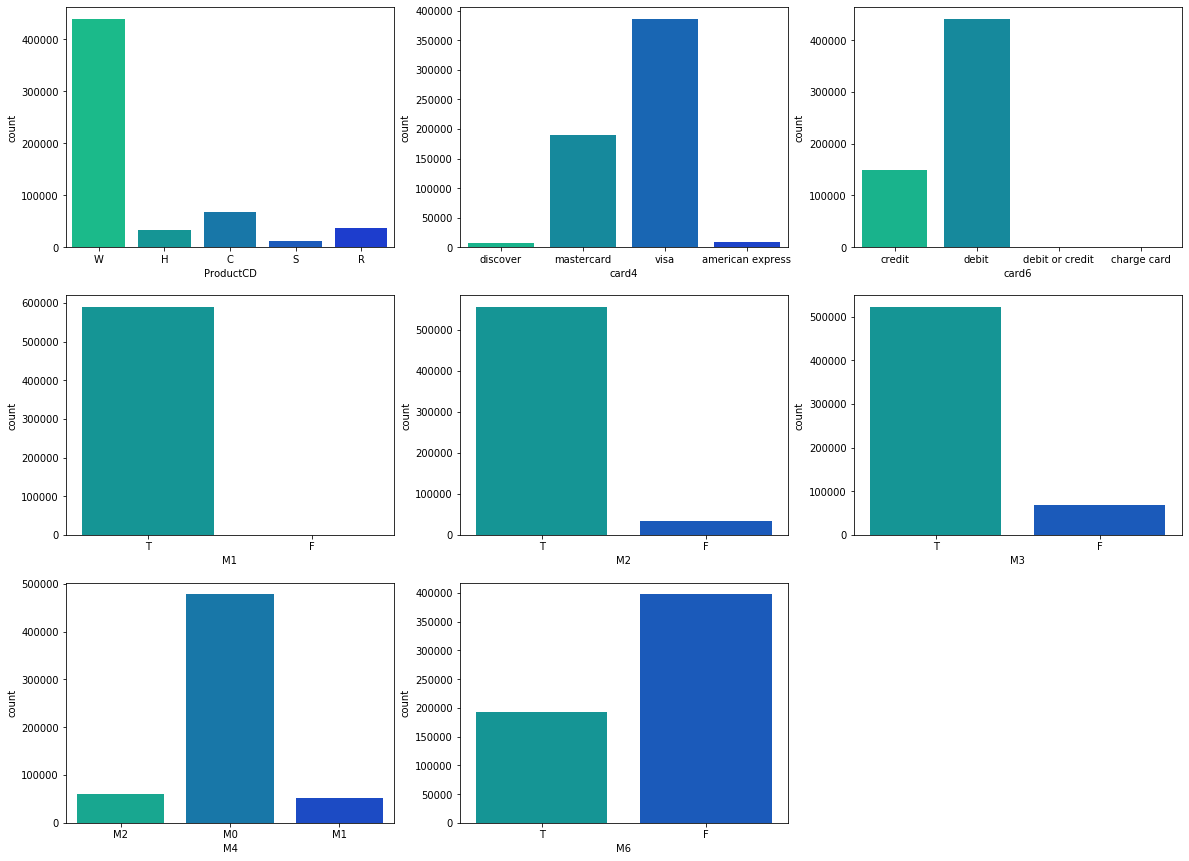

In [38]:
fig = plt.figure(figsize=(20,15))
j = 1
for i in cat_cols:
    if(i == 'P_emaildomain'):
        continue
    plt.subplot(3,3,j)
    sns.countplot(x=X[i], palette='winter_r')
    j = j + 1    
plt.show()

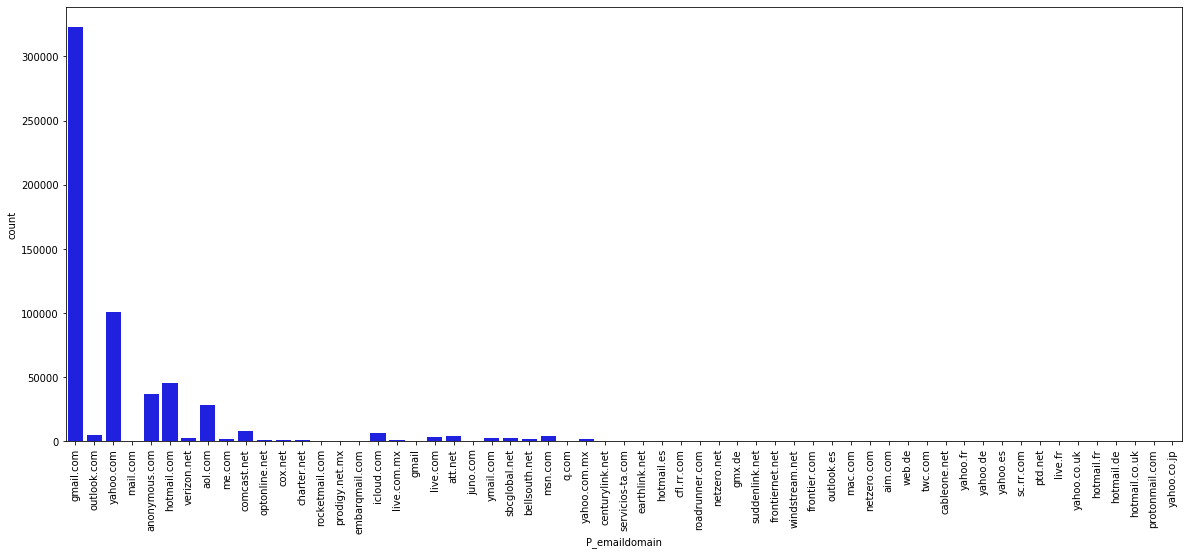

In [39]:
plt.figure(figsize=(20,8))
sns.countplot(x=X['P_emaildomain'], color='blue')
plt.xticks(rotation = 90)
plt.show()

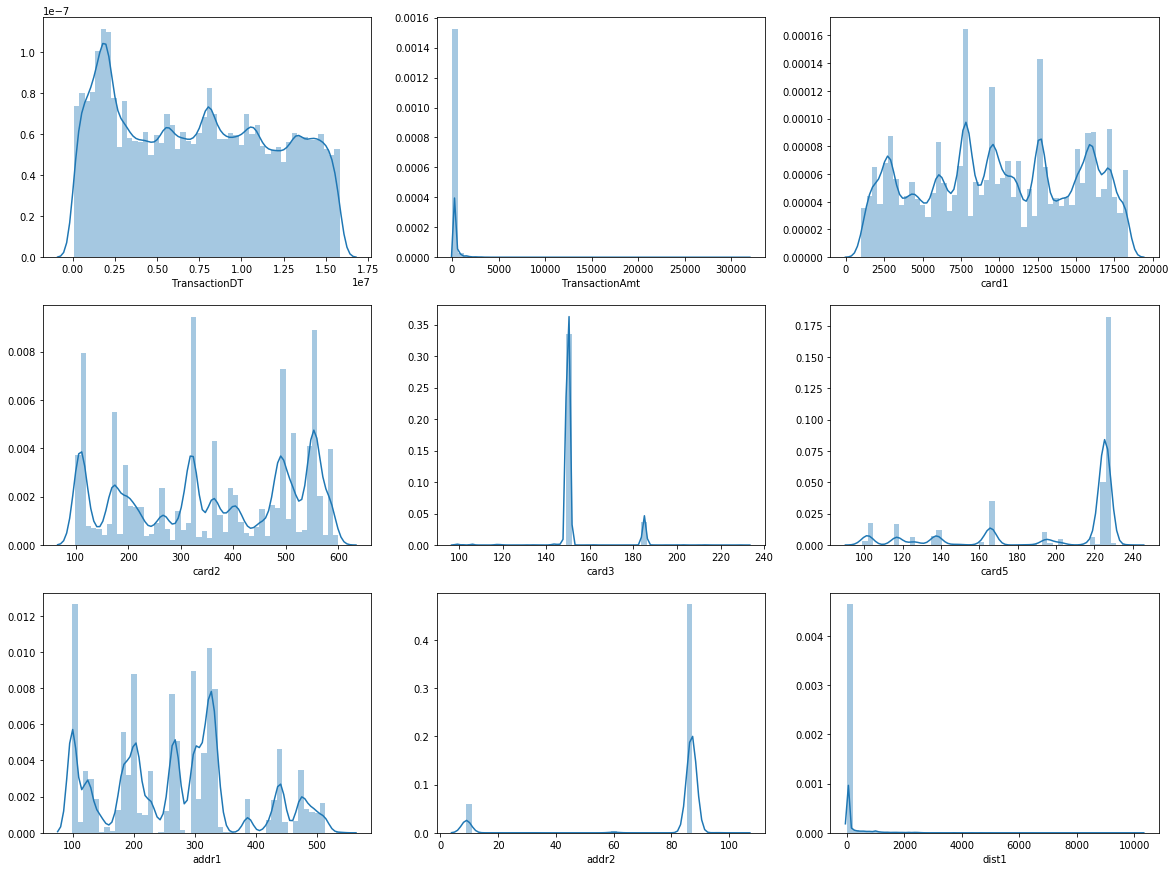

In [40]:
fig = plt.figure(figsize=(20,15))
j = 1
for i in num_cols[1:10]:
    plt.subplot(3,3,j)
    sns.distplot(a=X[i])
    j = j + 1
plt.show()

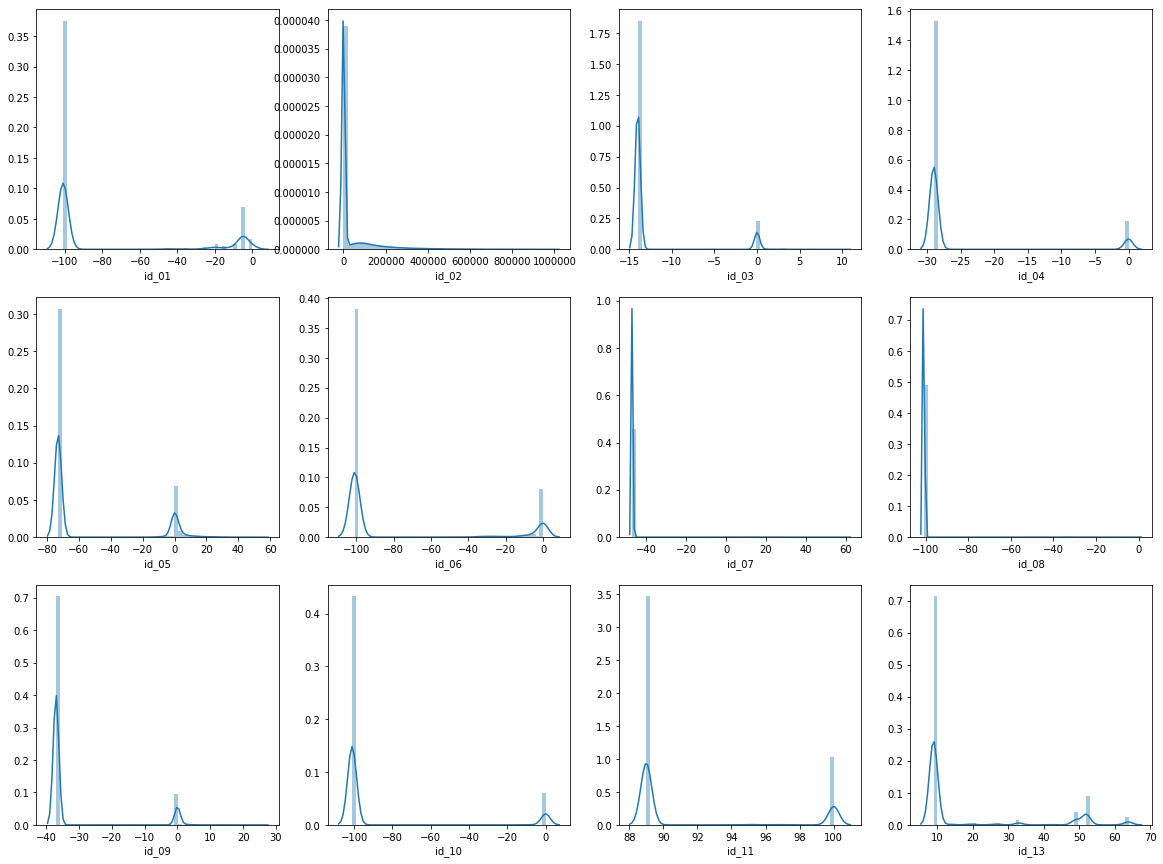

In [41]:
fig = plt.figure(figsize=(20,15))

j = 1
for i in num_cols[-23:-11]:
    plt.subplot(3,4,j)
    sns.distplot(a=X[i])
    j = j + 1
    
plt.show()

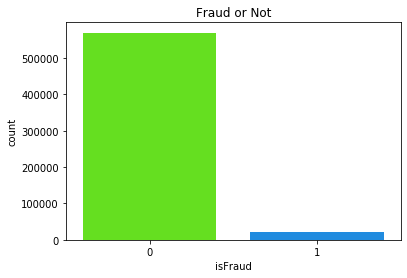

In [42]:
sns.countplot(x=y, palette='gist_rainbow')
plt.title('Fraud or Not')
plt.show()

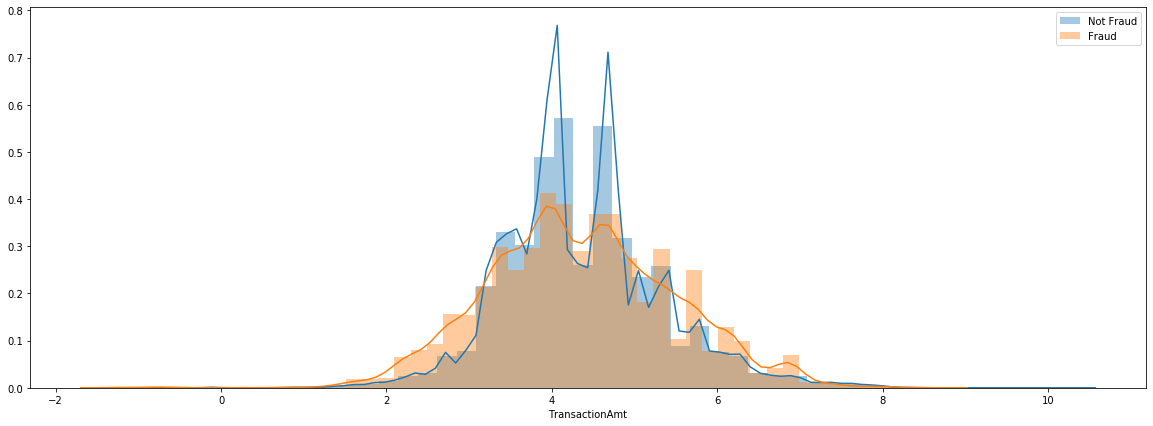

In [43]:
df1 = train[train['isFraud'] == 0]
not_fraud = df1['TransactionAmt'].apply(np.log) #we will apply log transformation to get better visualization 

df2 = train[train['isFraud'] == 1]
fraud = df2['TransactionAmt'].apply(np.log) #we will apply log transformation to get better visualization 

plt.figure(figsize=(20, 7))

sns.distplot(a=not_fraud, label='Not Fraud')
sns.distplot(a=fraud, label='Fraud')

plt.legend()

In [44]:
# X = X.drop('TransactionDT', axis=1)
# test = test.drop('TransactionDT', axis=1)

In [18]:
del train

In [19]:
for i in tqdm(cat_cols): 
    label = LabelEncoder()
    label.fit(list(X[i].values)+list(test[i].values))
    X[i] = label.transform(list(X[i].values))
    test[i] = label.transform(list(test[i].values))

100%|██████████| 15/15 [00:07<00:00,  1.95it/s]


In [20]:
X = X.drop('TransactionID', axis=1)
test = test.drop('TransactionID', axis=1)

In [21]:
X.to_pickle('./train_set.pkl')
y.to_pickle('./train_label.pkl')
test.to_pickle('./test_set.pkl')

In [20]:
train_mask = X.TransactionDT < 13000000
val_mask = X.TransactionDT >= 13000000

In [21]:
X_train = X[train_mask]
X_val = X[val_mask]
y_train = y[train_mask]
y_val = y[val_mask]

In [73]:
lgb_params = {
                'objective':'regression',
                'boosting_type':'gbdt',
                'metric':'auc',
                'n_jobs':8,
                'learning_rate':0.01,
                'num_leaves': 2**10,
                'min_child_samples': 40,
                'max_depth':12,
                'tree_learner':'serial',
                'colsample_bytree': 0.80,
                'n_estimators':2**10,
                'max_bin':255,
                'seed': 1337,
                'reg_alpha':0.3,
                'reg_lamdba':0.243
            }
lgb_params_crossval = {
                'num_leaves': [2**10],
                'n_estimators':[2**10],
                'max_depth':[12],
            }
model = lgb.LGBMClassifier(**lgb_params)

In [71]:
important_features = ['card1', 'addr1', 'card2', 'TransactionAmt', 'P_emaildomain', 'dist1', 'D15', 'D1', 'card5', 'C13']
Xl_train = X_train[important_features]
Xl_val = X_val[important_features]
Xl = X[important_features]

In [56]:
best_parameters_val, score_val, score_train, model = CrossValLabo.optimize_hparams(model, lgb_params, lgb_params_crossval, Xl_train, y_train, Xl_val, y_val)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
[CV] max_depth=12, n_estimators=1024, num_leaves=1024 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . max_depth=12, n_estimators=1024, num_leaves=1024, total=  28.8s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.8s finished


In [57]:
print(best_parameters_val)
print(score_val)
print(score_train)

{'max_depth': 12, 'n_estimators': 1024, 'num_leaves': 1024}
0.8532852844236363
0.9620874723739546


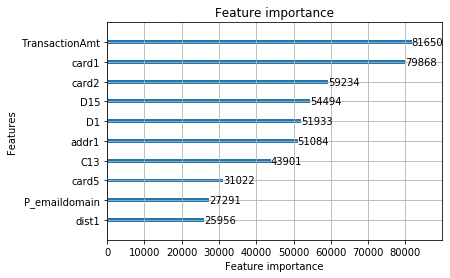

In [58]:
lgb.plot_importance(model)

In [74]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_score = []
i = 1
print('5 Fold Stratified Cross Validation')
print('-----------------------------------')
for train_index, test_index in kf.split(Xl, y):
    print('Fold no. {}'.format(i))
    xtr, ytr = Xl.loc[train_index], y.loc[train_index]
    xv, yv = Xl.loc[test_index], y.loc[test_index]
    clf = model
    clf.fit(xtr, ytr, eval_set=(xv, yv))
    score = f1_score(yv, clf.predict(xv))
    print('F1-Score : {}'.format(score))
    cv_score.append(score)
    i += 1
    print('-------------------------------------')

5 Fold Stratified Cross Validation
-----------------------------------
Fold no. 1
[1]	valid_0's auc: 0.812885
[2]	valid_0's auc: 0.8453
[3]	valid_0's auc: 0.846833
[4]	valid_0's auc: 0.854082
[5]	valid_0's auc: 0.856577
[6]	valid_0's auc: 0.860528
[7]	valid_0's auc: 0.862302
[8]	valid_0's auc: 0.863558
[9]	valid_0's auc: 0.865082
[10]	valid_0's auc: 0.867113
[11]	valid_0's auc: 0.867273
[12]	valid_0's auc: 0.867416
[13]	valid_0's auc: 0.868509
[14]	valid_0's auc: 0.869113
[15]	valid_0's auc: 0.8696
[16]	valid_0's auc: 0.869909
[17]	valid_0's auc: 0.871994
[18]	valid_0's auc: 0.872529
[19]	valid_0's auc: 0.87288
[20]	valid_0's auc: 0.874266
[21]	valid_0's auc: 0.875317
[22]	valid_0's auc: 0.875831
[23]	valid_0's auc: 0.875749
[24]	valid_0's auc: 0.87583
[25]	valid_0's auc: 0.876183
[26]	valid_0's auc: 0.875933
[27]	valid_0's auc: 0.875915
[28]	valid_0's auc: 0.876612
[29]	valid_0's auc: 0.877758
[30]	valid_0's auc: 0.877734
[31]	valid_0's auc: 0.878107
[32]	valid_0's auc: 0.878572
[33]	

[279]	valid_0's auc: 0.902059
[280]	valid_0's auc: 0.902135
[281]	valid_0's auc: 0.902157
[282]	valid_0's auc: 0.902192
[283]	valid_0's auc: 0.902207
[284]	valid_0's auc: 0.902259
[285]	valid_0's auc: 0.902337
[286]	valid_0's auc: 0.902371
[287]	valid_0's auc: 0.90243
[288]	valid_0's auc: 0.902475
[289]	valid_0's auc: 0.902494
[290]	valid_0's auc: 0.902571
[291]	valid_0's auc: 0.902562
[292]	valid_0's auc: 0.902556
[293]	valid_0's auc: 0.902638
[294]	valid_0's auc: 0.902643
[295]	valid_0's auc: 0.902708
[296]	valid_0's auc: 0.902709
[297]	valid_0's auc: 0.902772
[298]	valid_0's auc: 0.902782
[299]	valid_0's auc: 0.902967
[300]	valid_0's auc: 0.903037
[301]	valid_0's auc: 0.903052
[302]	valid_0's auc: 0.90309
[303]	valid_0's auc: 0.903122
[304]	valid_0's auc: 0.903131
[305]	valid_0's auc: 0.903134
[306]	valid_0's auc: 0.903146
[307]	valid_0's auc: 0.903146
[308]	valid_0's auc: 0.90315
[309]	valid_0's auc: 0.903203
[310]	valid_0's auc: 0.903231
[311]	valid_0's auc: 0.903271
[312]	valid_0

[560]	valid_0's auc: 0.911625
[561]	valid_0's auc: 0.911664
[562]	valid_0's auc: 0.911662
[563]	valid_0's auc: 0.911684
[564]	valid_0's auc: 0.911691
[565]	valid_0's auc: 0.911701
[566]	valid_0's auc: 0.911695
[567]	valid_0's auc: 0.911699
[568]	valid_0's auc: 0.91174
[569]	valid_0's auc: 0.911762
[570]	valid_0's auc: 0.911757
[571]	valid_0's auc: 0.911758
[572]	valid_0's auc: 0.911762
[573]	valid_0's auc: 0.911773
[574]	valid_0's auc: 0.911824
[575]	valid_0's auc: 0.911836
[576]	valid_0's auc: 0.911835
[577]	valid_0's auc: 0.911879
[578]	valid_0's auc: 0.911883
[579]	valid_0's auc: 0.911905
[580]	valid_0's auc: 0.911911
[581]	valid_0's auc: 0.911922
[582]	valid_0's auc: 0.911962
[583]	valid_0's auc: 0.912012
[584]	valid_0's auc: 0.912007
[585]	valid_0's auc: 0.912022
[586]	valid_0's auc: 0.912033
[587]	valid_0's auc: 0.912043
[588]	valid_0's auc: 0.912048
[589]	valid_0's auc: 0.912098
[590]	valid_0's auc: 0.912118
[591]	valid_0's auc: 0.912126
[592]	valid_0's auc: 0.912124
[593]	valid

[842]	valid_0's auc: 0.916716
[843]	valid_0's auc: 0.916738
[844]	valid_0's auc: 0.916748
[845]	valid_0's auc: 0.916779
[846]	valid_0's auc: 0.91682
[847]	valid_0's auc: 0.916865
[848]	valid_0's auc: 0.916875
[849]	valid_0's auc: 0.916875
[850]	valid_0's auc: 0.916889
[851]	valid_0's auc: 0.916931
[852]	valid_0's auc: 0.916929
[853]	valid_0's auc: 0.916954
[854]	valid_0's auc: 0.916992
[855]	valid_0's auc: 0.916994
[856]	valid_0's auc: 0.917023
[857]	valid_0's auc: 0.917022
[858]	valid_0's auc: 0.917034
[859]	valid_0's auc: 0.917069
[860]	valid_0's auc: 0.917078
[861]	valid_0's auc: 0.917081
[862]	valid_0's auc: 0.917082
[863]	valid_0's auc: 0.9171
[864]	valid_0's auc: 0.91713
[865]	valid_0's auc: 0.917133
[866]	valid_0's auc: 0.917158
[867]	valid_0's auc: 0.917201
[868]	valid_0's auc: 0.917265
[869]	valid_0's auc: 0.91726
[870]	valid_0's auc: 0.917308
[871]	valid_0's auc: 0.917303
[872]	valid_0's auc: 0.917336
[873]	valid_0's auc: 0.917335
[874]	valid_0's auc: 0.917354
[875]	valid_0's

[94]	valid_0's auc: 0.891276
[95]	valid_0's auc: 0.891331
[96]	valid_0's auc: 0.89138
[97]	valid_0's auc: 0.891535
[98]	valid_0's auc: 0.891674
[99]	valid_0's auc: 0.891761
[100]	valid_0's auc: 0.891832
[101]	valid_0's auc: 0.891922
[102]	valid_0's auc: 0.891902
[103]	valid_0's auc: 0.892088
[104]	valid_0's auc: 0.892146
[105]	valid_0's auc: 0.892133
[106]	valid_0's auc: 0.892301
[107]	valid_0's auc: 0.89236
[108]	valid_0's auc: 0.892484
[109]	valid_0's auc: 0.892529
[110]	valid_0's auc: 0.892576
[111]	valid_0's auc: 0.892598
[112]	valid_0's auc: 0.892804
[113]	valid_0's auc: 0.892875
[114]	valid_0's auc: 0.892934
[115]	valid_0's auc: 0.893027
[116]	valid_0's auc: 0.893142
[117]	valid_0's auc: 0.89311
[118]	valid_0's auc: 0.893296
[119]	valid_0's auc: 0.893404
[120]	valid_0's auc: 0.893471
[121]	valid_0's auc: 0.893663
[122]	valid_0's auc: 0.893676
[123]	valid_0's auc: 0.893722
[124]	valid_0's auc: 0.893899
[125]	valid_0's auc: 0.893954
[126]	valid_0's auc: 0.894086
[127]	valid_0's auc

[374]	valid_0's auc: 0.910145
[375]	valid_0's auc: 0.910147
[376]	valid_0's auc: 0.910179
[377]	valid_0's auc: 0.910219
[378]	valid_0's auc: 0.910208
[379]	valid_0's auc: 0.910315
[380]	valid_0's auc: 0.910386
[381]	valid_0's auc: 0.910385
[382]	valid_0's auc: 0.910381
[383]	valid_0's auc: 0.910377
[384]	valid_0's auc: 0.910397
[385]	valid_0's auc: 0.910532
[386]	valid_0's auc: 0.910523
[387]	valid_0's auc: 0.910522
[388]	valid_0's auc: 0.910569
[389]	valid_0's auc: 0.910672
[390]	valid_0's auc: 0.910714
[391]	valid_0's auc: 0.910715
[392]	valid_0's auc: 0.910725
[393]	valid_0's auc: 0.910878
[394]	valid_0's auc: 0.910914
[395]	valid_0's auc: 0.910933
[396]	valid_0's auc: 0.910953
[397]	valid_0's auc: 0.911019
[398]	valid_0's auc: 0.911023
[399]	valid_0's auc: 0.911056
[400]	valid_0's auc: 0.911077
[401]	valid_0's auc: 0.911117
[402]	valid_0's auc: 0.911187
[403]	valid_0's auc: 0.911187
[404]	valid_0's auc: 0.911276
[405]	valid_0's auc: 0.911316
[406]	valid_0's auc: 0.91134
[407]	valid

[652]	valid_0's auc: 0.916117
[653]	valid_0's auc: 0.916146
[654]	valid_0's auc: 0.916149
[655]	valid_0's auc: 0.916145
[656]	valid_0's auc: 0.916164
[657]	valid_0's auc: 0.916165
[658]	valid_0's auc: 0.916197
[659]	valid_0's auc: 0.916224
[660]	valid_0's auc: 0.916216
[661]	valid_0's auc: 0.91623
[662]	valid_0's auc: 0.916235
[663]	valid_0's auc: 0.916256
[664]	valid_0's auc: 0.916315
[665]	valid_0's auc: 0.916332
[666]	valid_0's auc: 0.916355
[667]	valid_0's auc: 0.916364
[668]	valid_0's auc: 0.916367
[669]	valid_0's auc: 0.916364
[670]	valid_0's auc: 0.916393
[671]	valid_0's auc: 0.916405
[672]	valid_0's auc: 0.916423
[673]	valid_0's auc: 0.916428
[674]	valid_0's auc: 0.916453
[675]	valid_0's auc: 0.916463
[676]	valid_0's auc: 0.916512
[677]	valid_0's auc: 0.916509
[678]	valid_0's auc: 0.916512
[679]	valid_0's auc: 0.916512
[680]	valid_0's auc: 0.916557
[681]	valid_0's auc: 0.91657
[682]	valid_0's auc: 0.916566
[683]	valid_0's auc: 0.916586
[684]	valid_0's auc: 0.916594
[685]	valid_

[928]	valid_0's auc: 0.920655
[929]	valid_0's auc: 0.920665
[930]	valid_0's auc: 0.920668
[931]	valid_0's auc: 0.920674
[932]	valid_0's auc: 0.920685
[933]	valid_0's auc: 0.920706
[934]	valid_0's auc: 0.920705
[935]	valid_0's auc: 0.920707
[936]	valid_0's auc: 0.920715
[937]	valid_0's auc: 0.920736
[938]	valid_0's auc: 0.920758
[939]	valid_0's auc: 0.920776
[940]	valid_0's auc: 0.920794
[941]	valid_0's auc: 0.920811
[942]	valid_0's auc: 0.920829
[943]	valid_0's auc: 0.920835
[944]	valid_0's auc: 0.920829
[945]	valid_0's auc: 0.920811
[946]	valid_0's auc: 0.920811
[947]	valid_0's auc: 0.920809
[948]	valid_0's auc: 0.920853
[949]	valid_0's auc: 0.920862
[950]	valid_0's auc: 0.920885
[951]	valid_0's auc: 0.920904
[952]	valid_0's auc: 0.920898
[953]	valid_0's auc: 0.920899
[954]	valid_0's auc: 0.920908
[955]	valid_0's auc: 0.920903
[956]	valid_0's auc: 0.92092
[957]	valid_0's auc: 0.92092
[958]	valid_0's auc: 0.920917
[959]	valid_0's auc: 0.920917
[960]	valid_0's auc: 0.920915
[961]	valid_

[181]	valid_0's auc: 0.900404
[182]	valid_0's auc: 0.900501
[183]	valid_0's auc: 0.900554
[184]	valid_0's auc: 0.900584
[185]	valid_0's auc: 0.900618
[186]	valid_0's auc: 0.900681
[187]	valid_0's auc: 0.900726
[188]	valid_0's auc: 0.900842
[189]	valid_0's auc: 0.900897
[190]	valid_0's auc: 0.900967
[191]	valid_0's auc: 0.90097
[192]	valid_0's auc: 0.901135
[193]	valid_0's auc: 0.901134
[194]	valid_0's auc: 0.901147
[195]	valid_0's auc: 0.901148
[196]	valid_0's auc: 0.901261
[197]	valid_0's auc: 0.90131
[198]	valid_0's auc: 0.901491
[199]	valid_0's auc: 0.901506
[200]	valid_0's auc: 0.901696
[201]	valid_0's auc: 0.901791
[202]	valid_0's auc: 0.901861
[203]	valid_0's auc: 0.901983
[204]	valid_0's auc: 0.902085
[205]	valid_0's auc: 0.902232
[206]	valid_0's auc: 0.902415
[207]	valid_0's auc: 0.902659
[208]	valid_0's auc: 0.902689
[209]	valid_0's auc: 0.902757
[210]	valid_0's auc: 0.902878
[211]	valid_0's auc: 0.903076
[212]	valid_0's auc: 0.903115
[213]	valid_0's auc: 0.903216
[214]	valid_

[459]	valid_0's auc: 0.913412
[460]	valid_0's auc: 0.913404
[461]	valid_0's auc: 0.913434
[462]	valid_0's auc: 0.913464
[463]	valid_0's auc: 0.913471
[464]	valid_0's auc: 0.913492
[465]	valid_0's auc: 0.913483
[466]	valid_0's auc: 0.913496
[467]	valid_0's auc: 0.913529
[468]	valid_0's auc: 0.913518
[469]	valid_0's auc: 0.913522
[470]	valid_0's auc: 0.91353
[471]	valid_0's auc: 0.913588
[472]	valid_0's auc: 0.913598
[473]	valid_0's auc: 0.9136
[474]	valid_0's auc: 0.913593
[475]	valid_0's auc: 0.913665
[476]	valid_0's auc: 0.913676
[477]	valid_0's auc: 0.913714
[478]	valid_0's auc: 0.913726
[479]	valid_0's auc: 0.913741
[480]	valid_0's auc: 0.913788
[481]	valid_0's auc: 0.913795
[482]	valid_0's auc: 0.91384
[483]	valid_0's auc: 0.913871
[484]	valid_0's auc: 0.913906
[485]	valid_0's auc: 0.913914
[486]	valid_0's auc: 0.913977
[487]	valid_0's auc: 0.914022
[488]	valid_0's auc: 0.914047
[489]	valid_0's auc: 0.914056
[490]	valid_0's auc: 0.914103
[491]	valid_0's auc: 0.914138
[492]	valid_0'

[734]	valid_0's auc: 0.918493
[735]	valid_0's auc: 0.91852
[736]	valid_0's auc: 0.918514
[737]	valid_0's auc: 0.918531
[738]	valid_0's auc: 0.918588
[739]	valid_0's auc: 0.918588
[740]	valid_0's auc: 0.91861
[741]	valid_0's auc: 0.918624
[742]	valid_0's auc: 0.918623
[743]	valid_0's auc: 0.91865
[744]	valid_0's auc: 0.918695
[745]	valid_0's auc: 0.918754
[746]	valid_0's auc: 0.918779
[747]	valid_0's auc: 0.918798
[748]	valid_0's auc: 0.918823
[749]	valid_0's auc: 0.918816
[750]	valid_0's auc: 0.918846
[751]	valid_0's auc: 0.918839
[752]	valid_0's auc: 0.918846
[753]	valid_0's auc: 0.918844
[754]	valid_0's auc: 0.918855
[755]	valid_0's auc: 0.918906
[756]	valid_0's auc: 0.918912
[757]	valid_0's auc: 0.918908
[758]	valid_0's auc: 0.918911
[759]	valid_0's auc: 0.918916
[760]	valid_0's auc: 0.918928
[761]	valid_0's auc: 0.918935
[762]	valid_0's auc: 0.918933
[763]	valid_0's auc: 0.918948
[764]	valid_0's auc: 0.919002
[765]	valid_0's auc: 0.919008
[766]	valid_0's auc: 0.919035
[767]	valid_0

[1014]	valid_0's auc: 0.922262
[1015]	valid_0's auc: 0.92226
[1016]	valid_0's auc: 0.922252
[1017]	valid_0's auc: 0.922259
[1018]	valid_0's auc: 0.92226
[1019]	valid_0's auc: 0.922277
[1020]	valid_0's auc: 0.922285
[1021]	valid_0's auc: 0.922286
[1022]	valid_0's auc: 0.922307
[1023]	valid_0's auc: 0.922306
[1024]	valid_0's auc: 0.922306
F1-Score : 0.3474069789859263
-------------------------------------
Fold no. 4
[1]	valid_0's auc: 0.817231
[2]	valid_0's auc: 0.851044
[3]	valid_0's auc: 0.854751
[4]	valid_0's auc: 0.861421
[5]	valid_0's auc: 0.864049
[6]	valid_0's auc: 0.869015
[7]	valid_0's auc: 0.870673
[8]	valid_0's auc: 0.871514
[9]	valid_0's auc: 0.872161
[10]	valid_0's auc: 0.873065
[11]	valid_0's auc: 0.873473
[12]	valid_0's auc: 0.873572
[13]	valid_0's auc: 0.874782
[14]	valid_0's auc: 0.875273
[15]	valid_0's auc: 0.875661
[16]	valid_0's auc: 0.875977
[17]	valid_0's auc: 0.877343
[18]	valid_0's auc: 0.877332
[19]	valid_0's auc: 0.877741
[20]	valid_0's auc: 0.878467
[21]	valid_

[265]	valid_0's auc: 0.905389
[266]	valid_0's auc: 0.905457
[267]	valid_0's auc: 0.905549
[268]	valid_0's auc: 0.905647
[269]	valid_0's auc: 0.905725
[270]	valid_0's auc: 0.905806
[271]	valid_0's auc: 0.905873
[272]	valid_0's auc: 0.905932
[273]	valid_0's auc: 0.906001
[274]	valid_0's auc: 0.906053
[275]	valid_0's auc: 0.906127
[276]	valid_0's auc: 0.906178
[277]	valid_0's auc: 0.906215
[278]	valid_0's auc: 0.90622
[279]	valid_0's auc: 0.906258
[280]	valid_0's auc: 0.906343
[281]	valid_0's auc: 0.906439
[282]	valid_0's auc: 0.906491
[283]	valid_0's auc: 0.906516
[284]	valid_0's auc: 0.906533
[285]	valid_0's auc: 0.906606
[286]	valid_0's auc: 0.906615
[287]	valid_0's auc: 0.906685
[288]	valid_0's auc: 0.906726
[289]	valid_0's auc: 0.90679
[290]	valid_0's auc: 0.906821
[291]	valid_0's auc: 0.906834
[292]	valid_0's auc: 0.906898
[293]	valid_0's auc: 0.90694
[294]	valid_0's auc: 0.907002
[295]	valid_0's auc: 0.907078
[296]	valid_0's auc: 0.907113
[297]	valid_0's auc: 0.907119
[298]	valid_0

[540]	valid_0's auc: 0.914007
[541]	valid_0's auc: 0.914071
[542]	valid_0's auc: 0.91408
[543]	valid_0's auc: 0.914093
[544]	valid_0's auc: 0.91411
[545]	valid_0's auc: 0.91411
[546]	valid_0's auc: 0.914105
[547]	valid_0's auc: 0.914142
[548]	valid_0's auc: 0.91414
[549]	valid_0's auc: 0.914136
[550]	valid_0's auc: 0.914173
[551]	valid_0's auc: 0.914212
[552]	valid_0's auc: 0.914228
[553]	valid_0's auc: 0.914248
[554]	valid_0's auc: 0.914252
[555]	valid_0's auc: 0.914257
[556]	valid_0's auc: 0.914251
[557]	valid_0's auc: 0.914244
[558]	valid_0's auc: 0.914256
[559]	valid_0's auc: 0.914301
[560]	valid_0's auc: 0.914305
[561]	valid_0's auc: 0.914321
[562]	valid_0's auc: 0.914338
[563]	valid_0's auc: 0.914414
[564]	valid_0's auc: 0.914415
[565]	valid_0's auc: 0.914431
[566]	valid_0's auc: 0.914444
[567]	valid_0's auc: 0.914455
[568]	valid_0's auc: 0.914439
[569]	valid_0's auc: 0.914433
[570]	valid_0's auc: 0.91444
[571]	valid_0's auc: 0.91445
[572]	valid_0's auc: 0.914457
[573]	valid_0's 

[815]	valid_0's auc: 0.918142
[816]	valid_0's auc: 0.918139
[817]	valid_0's auc: 0.918131
[818]	valid_0's auc: 0.918157
[819]	valid_0's auc: 0.918168
[820]	valid_0's auc: 0.918155
[821]	valid_0's auc: 0.918196
[822]	valid_0's auc: 0.918193
[823]	valid_0's auc: 0.918205
[824]	valid_0's auc: 0.918239
[825]	valid_0's auc: 0.918262
[826]	valid_0's auc: 0.91828
[827]	valid_0's auc: 0.9183
[828]	valid_0's auc: 0.918314
[829]	valid_0's auc: 0.918298
[830]	valid_0's auc: 0.918316
[831]	valid_0's auc: 0.918349
[832]	valid_0's auc: 0.91838
[833]	valid_0's auc: 0.918404
[834]	valid_0's auc: 0.918422
[835]	valid_0's auc: 0.918406
[836]	valid_0's auc: 0.918426
[837]	valid_0's auc: 0.918439
[838]	valid_0's auc: 0.918453
[839]	valid_0's auc: 0.918466
[840]	valid_0's auc: 0.918466
[841]	valid_0's auc: 0.918467
[842]	valid_0's auc: 0.918505
[843]	valid_0's auc: 0.918515
[844]	valid_0's auc: 0.918527
[845]	valid_0's auc: 0.918532
[846]	valid_0's auc: 0.918533
[847]	valid_0's auc: 0.918563
[848]	valid_0'

[67]	valid_0's auc: 0.885056
[68]	valid_0's auc: 0.885101
[69]	valid_0's auc: 0.885437
[70]	valid_0's auc: 0.885771
[71]	valid_0's auc: 0.885929
[72]	valid_0's auc: 0.886155
[73]	valid_0's auc: 0.886313
[74]	valid_0's auc: 0.886396
[75]	valid_0's auc: 0.886505
[76]	valid_0's auc: 0.886608
[77]	valid_0's auc: 0.886902
[78]	valid_0's auc: 0.886998
[79]	valid_0's auc: 0.88713
[80]	valid_0's auc: 0.887279
[81]	valid_0's auc: 0.887404
[82]	valid_0's auc: 0.887394
[83]	valid_0's auc: 0.88737
[84]	valid_0's auc: 0.887406
[85]	valid_0's auc: 0.887601
[86]	valid_0's auc: 0.887951
[87]	valid_0's auc: 0.888117
[88]	valid_0's auc: 0.888274
[89]	valid_0's auc: 0.888325
[90]	valid_0's auc: 0.888594
[91]	valid_0's auc: 0.888633
[92]	valid_0's auc: 0.888686
[93]	valid_0's auc: 0.888768
[94]	valid_0's auc: 0.889053
[95]	valid_0's auc: 0.889069
[96]	valid_0's auc: 0.889366
[97]	valid_0's auc: 0.889482
[98]	valid_0's auc: 0.889645
[99]	valid_0's auc: 0.889642
[100]	valid_0's auc: 0.889948
[101]	valid_0's

[346]	valid_0's auc: 0.908301
[347]	valid_0's auc: 0.908325
[348]	valid_0's auc: 0.908395
[349]	valid_0's auc: 0.908405
[350]	valid_0's auc: 0.908455
[351]	valid_0's auc: 0.90849
[352]	valid_0's auc: 0.908567
[353]	valid_0's auc: 0.908593
[354]	valid_0's auc: 0.908623
[355]	valid_0's auc: 0.908642
[356]	valid_0's auc: 0.908663
[357]	valid_0's auc: 0.9087
[358]	valid_0's auc: 0.908718
[359]	valid_0's auc: 0.908795
[360]	valid_0's auc: 0.908854
[361]	valid_0's auc: 0.908859
[362]	valid_0's auc: 0.908895
[363]	valid_0's auc: 0.908969
[364]	valid_0's auc: 0.909007
[365]	valid_0's auc: 0.909066
[366]	valid_0's auc: 0.909123
[367]	valid_0's auc: 0.90916
[368]	valid_0's auc: 0.90924
[369]	valid_0's auc: 0.909275
[370]	valid_0's auc: 0.909336
[371]	valid_0's auc: 0.909363
[372]	valid_0's auc: 0.909391
[373]	valid_0's auc: 0.909472
[374]	valid_0's auc: 0.909545
[375]	valid_0's auc: 0.909562
[376]	valid_0's auc: 0.909669
[377]	valid_0's auc: 0.909724
[378]	valid_0's auc: 0.909741
[379]	valid_0's

[622]	valid_0's auc: 0.917575
[623]	valid_0's auc: 0.917594
[624]	valid_0's auc: 0.917599
[625]	valid_0's auc: 0.917605
[626]	valid_0's auc: 0.917616
[627]	valid_0's auc: 0.917659
[628]	valid_0's auc: 0.91771
[629]	valid_0's auc: 0.917777
[630]	valid_0's auc: 0.917782
[631]	valid_0's auc: 0.917792
[632]	valid_0's auc: 0.917823
[633]	valid_0's auc: 0.917836
[634]	valid_0's auc: 0.917908
[635]	valid_0's auc: 0.91793
[636]	valid_0's auc: 0.91793
[637]	valid_0's auc: 0.917941
[638]	valid_0's auc: 0.917939
[639]	valid_0's auc: 0.917941
[640]	valid_0's auc: 0.917954
[641]	valid_0's auc: 0.917978
[642]	valid_0's auc: 0.91799
[643]	valid_0's auc: 0.917996
[644]	valid_0's auc: 0.918068
[645]	valid_0's auc: 0.918127
[646]	valid_0's auc: 0.918168
[647]	valid_0's auc: 0.918167
[648]	valid_0's auc: 0.918173
[649]	valid_0's auc: 0.918169
[650]	valid_0's auc: 0.918202
[651]	valid_0's auc: 0.91821
[652]	valid_0's auc: 0.918214
[653]	valid_0's auc: 0.918275
[654]	valid_0's auc: 0.91828
[655]	valid_0's 

[902]	valid_0's auc: 0.922916
[903]	valid_0's auc: 0.922916
[904]	valid_0's auc: 0.92294
[905]	valid_0's auc: 0.922961
[906]	valid_0's auc: 0.922967
[907]	valid_0's auc: 0.922968
[908]	valid_0's auc: 0.922969
[909]	valid_0's auc: 0.922969
[910]	valid_0's auc: 0.923003
[911]	valid_0's auc: 0.923029
[912]	valid_0's auc: 0.923024
[913]	valid_0's auc: 0.923051
[914]	valid_0's auc: 0.923053
[915]	valid_0's auc: 0.923062
[916]	valid_0's auc: 0.923094
[917]	valid_0's auc: 0.9231
[918]	valid_0's auc: 0.923133
[919]	valid_0's auc: 0.923139
[920]	valid_0's auc: 0.923143
[921]	valid_0's auc: 0.92317
[922]	valid_0's auc: 0.923172
[923]	valid_0's auc: 0.923169
[924]	valid_0's auc: 0.92317
[925]	valid_0's auc: 0.923167
[926]	valid_0's auc: 0.923167
[927]	valid_0's auc: 0.923166
[928]	valid_0's auc: 0.923175
[929]	valid_0's auc: 0.923185
[930]	valid_0's auc: 0.923185
[931]	valid_0's auc: 0.923181
[932]	valid_0's auc: 0.923178
[933]	valid_0's auc: 0.923201
[934]	valid_0's auc: 0.923203
[935]	valid_0's

In [75]:
print('Mean F1-Score : {}'.format(np.array(cv_score).mean()))

Mean F1-Score : 0.34074391535199344


In [59]:
testl = test[important_features]